In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [6]:
# Import dataset

df = pd.read_csv('C:/Users/phuro/UCSD/ULI/H2H/ULI-UCSD_H2H/LIHTC_analysis/data/cleanLIHTC.csv', index_col=0)
df.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap_amt,cdbg,cdbg_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct,record_stat
0,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,60.125469,-149.446060,NaN,NaN,68560.0,02XXXXXXXXX,02XXXXXXXXX,02122001300,2,122,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,20.0,NaN,NaN,NaN,X
1,AKA0000X034,YENLO PHASE I AND II,402-451 NORTH YENLO STREET,WASILLA,AK,99654,AK-99-99,61.583096,-149.437637,NaN,NaN,83080.0,02XXXXXXXXX,02XXXXXXXXX,02170000800,2,170,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,37.0,37.0,NaN,NaN,NaN,U
2,AKA19890010,PARK WEST APTS,2012 SANDVIK ST,FAIRBANKS,AK,99709,AK-89-00001,64.851646,-147.803421,1080.0,16750.0,16750.0,02090000600,02090000600,02090000600,2,90,2.0,NaN,83.0,81.0,0.0,41.0,42.0,0.0,0.0,NaN,NaN,NaN,1989,1989.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,83.0,81.0,1.0,NaN,2.0,X
3,AKA19900005,TYSON'S TERRACE,103 BURKHART DR,SITKA,AK,99835,AK-90-00001,57.048874,-135.303024,3040.0,70540.0,70540.0,02220967500,02220000100,02220000100,2,220,2.0,NaN,16.0,16.0,0.0,16.0,0.0,0.0,0.0,NaN,NaN,NaN,1990,1990.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,16.0,16.0,1.0,NaN,2.0,X
4,AKA19910005,NORTHWOOD APTS,190 PARKWOOD CIR,SOLDOTNA,AK,99669,AK-91-00001,60.489147,-151.073853,2810.0,65345.0,71640.0,02122953200,02122000500,02122000500,2,122,2.0,NaN,23.0,22.0,0.0,23.0,0.0,0.0,0.0,NaN,NaN,NaN,1991,1991.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,23.0,22.0,1.0,NaN,2.0,X


In [7]:
df.drop(columns=['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'latitude', 'longitude', 'place1990', 'place2000',
       'place2010', 'fips1990', 'fips2000', 'fips2010', 'st2010', 'cnty2010',
       'scattered_site_cd', 'record_stat'], inplace=True)

In [8]:
df.head()

,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap_amt,cdbg,cdbg_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct
0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,20.0,NaN,NaN,NaN
1,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,37.0,37.0,NaN,NaN,NaN
2,NaN,83.0,81.0,0.0,41.0,42.0,0.0,0.0,NaN,NaN,NaN,1989,1989.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,83.0,81.0,1.0,NaN,2.0
3,NaN,16.0,16.0,0.0,16.0,0.0,0.0,0.0,NaN,NaN,NaN,1990,1990.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,16.0,16.0,1.0,NaN,2.0
4,NaN,23.0,22.0,0.0,23.0,0.0,0.0,0.0,NaN,NaN,NaN,1991,1991.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,23.0,22.0,1.0,NaN,2.0


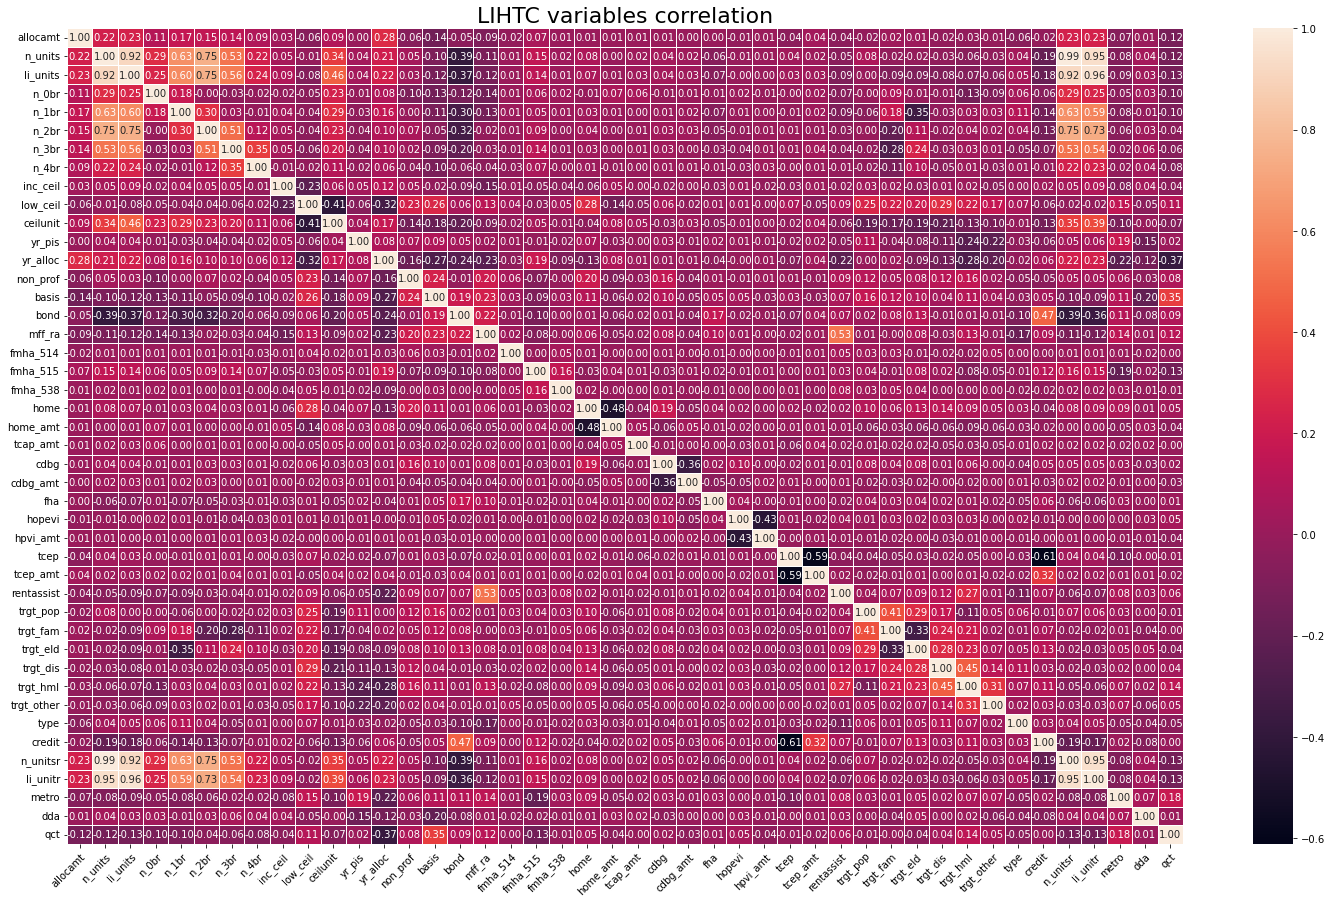

In [9]:
# Visualize variables on heat map

plt.figure(figsize=(25,15))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
props = plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('LIHTC variables correlation', size=22);

In [10]:
df.corr()

,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap_amt,cdbg,cdbg_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct
allocamt,1.000000,0.219613,0.232836,0.111427,0.166316,0.151608,0.139208,0.087697,0.032141,-0.062034,0.094184,0.002338,0.279240,-0.058043,-0.140143,-0.045618,-0.090390,-0.019617,0.065645,0.011016,0.010192,0.010967,0.005882,0.009807,0.002900,0.000258,-0.013827,0.007186,-0.039508,0.037264,-0.043063,-0.015197,0.019560,0.012359,-0.019624,-0.025762,-0.011048,-0.056701,-0.015107,0.226317,0.232249,-0.067780,0.005861,-0.117808
n_units,0.219613,1.000000,0.916424,0.287653,0.632821,0.749705,0.528154,0.222862,0.051117,-0.012871,0.341182,0.044629,0.209573,0.049310,-0.101425,-0.385640,-0.107979,0.014097,0.154576,0.023091,0.078557,0.001748,0.018732,0.043861,0.021090,-0.062633,-0.005109,0.005858,0.035315,0.017838,-0.052040,0.076900,-0.024266,-0.016909,-0.026705,-0.057309,-0.032462,0.039277,-0.186934,0.994081,0.946647,-0.081789,0.043510,-0.124537
li_units,0.232836,0.916424,1.000000,0.252483,0.603998,0.749243,0.556845,0.241717,0.088815,-0.075339,0.460360,0.043348,0.222844,0.028671,-0.115118,-0.374340,-0.120211,0.009998,0.140087,0.012355,0.065547,0.010510,0.026955,0.036927,0.025626,-0.069085,-0.004860,0.004478,0.034187,0.030281,-0.093263,0.003373,-0.086449,-0.090518,-0.083327,-0.074351,-0.060971,0.054182,-0.175507,0.921130,0.964765,-0.088670,0.025281,-0.125896
n_0br,0.111427,0.287653,0.252483,1.000000,0.176118,-0.002454,-0.033862,-0.015488,-0.016986,-0.048469,0.226621,-0.010238,0.081455,-0.099895,-0.133566,-0.115211,-0.135971,0.009086,0.064582,0.018577,-0.005096,0.066521,0.056769,-0.006360,0.010374,-0.013510,0.015534,-0.006526,-0.002261,0.022548,-0.065367,-0.004739,0.086614,-0.007272,-0.014237,-0.129371,-0.087688,0.055483,-0.061459,0.287819,0.246047,-0.049703,0.032505,-0.103279
n_1br,0.166316,0.632821,0.603998,0.176118,1.000000,0.296368,0.025208,-0.013332,0.040318,-0.036650,0.290409,-0.027431,0.161389,0.003645,-0.113586,-0.303607,-0.131914,0.012359,0.052673,0.013677,0.033937,0.005964,0.001862,0.008818,0.015723,-0.065238,0.009493,0.003842,-0.009466,0.019887,-0.089185,-0.056989,0.176803,-0.346198,-0.025354,0.029440,0.033548,0.111228,-0.137719,0.633764,0.589386,-0.081536,-0.014018,-0.097546
n_2br,0.151608,0.749705,0.749243,-0.002454,0.296368,1.000000,0.505755,0.120463,0.051496,-0.040043,0.228632,-0.037504,0.097082,0.065537,-0.049977,-0.316269,-0.017004,0.007349,0.094326,0.003136,0.044618,0.000683,0.006714,0.034050,0.034038,-0.052185,-0.013855,0.005937,0.012516,0.008144,-0.033271,0.003403,-0.200713,0.107053,-0.017527,0.035568,0.017736,0.037823,-0.132257,0.747971,0.729531,-0.057163,0.025888,-0.041629
n_3br,0.139208,0.528154,0.556845,-0.033862,0.025208,0.505755,1.000000,0.348535,0.052650,-0.058515,0.204387,-0.038595,0.099301,0.022631,-0.090428,-0.201099,-0.027031,-0.010877,0.137065,0.005067,0.029069,0.003773,0.012162,0.027918,0.003242,-0.034200,-0.035791,0.013094,0.006722,0.042000,-0.036333,-0.024178,-0.278957,0.242227,-0.029042,0.031867,0.006236,-0.052563,-0.072674,0.525920,0.538409,-0.022144,0.056942,-0.058802
n_4br,0.087697,0.222862,0.241717,-0.015488,-0.013332,0.120463,0.348535,1.000000,-0.013080,-0.017862,0.108153,-0.015013,0.060731,-0.037118,-0.103918,-0.055342,-0.044953,-0.025930,0.067083,-0.003443,0.012547,-0.011412,0.001547,0.012145,0.008294,-0.005595,-0.025726,0.029373,-0.002287,0.010073,-0.012116,-0.020490,-0.107284,0.102528,-0.049656,0.012062,-0.033251,0.008502,-0.008499,0.221903,0.232989,-0.023083,0.041755,-0.078571
inc_ceil,0.032141,0.051117,0.088815,-0.016986,0.040318,0.051496,0.052650,-0.013080,1.000000,-0.226733,0.062639,0.049179,0.124108,0.045304,-0.021074,-0.085107,-0.147766,-0.013413,-0.046136,-0.042090,-0.058546,0.045408,-0.004755,-0.017748,0.003755,-0.031098,0.013218,-0.015829,-0.027476,0.012582,-0.01

In [11]:
def rankCorr(colName, minCorr=0.10):
    corr = df.corr()
    corr.sort_values(by=colName, ascending=False, inplace=True)
    relevantFeatCorr = corr[abs(corr[colName]) >= minCorr][colName][1:]
    print(relevantFeatCorr)


<AxesSubplot:xlabel='yr_alloc', ylabel='allocamt'>

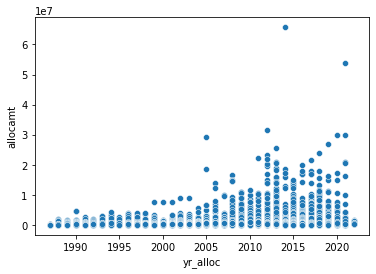

In [14]:
sns.scatterplot(data=df, x='yr_alloc', y='allocamt')

In [26]:
rankCorr('allocamt')``

yr_alloc    0.279240
li_units    0.232836
li_unitr    0.232249
n_unitsr    0.226317
n_units     0.219613
n_1br       0.166316
n_2br       0.151608
n_3br       0.139208
n_0br       0.111427
qct        -0.117808
basis      -0.140143
Name: allocamt, dtype: float64


<AxesSubplot:xlabel='yr_alloc', ylabel='dda'>

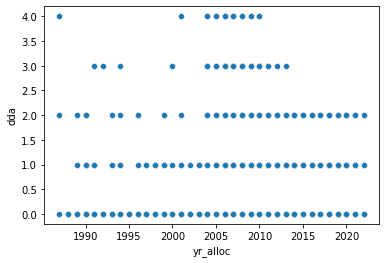

In [15]:
sns.scatterplot(data=df, x='yr_alloc', y='dda')

In [27]:
rankCorr('dda')

yr_alloc   -0.122575
yr_pis     -0.148313
basis      -0.198107
Name: dda, dtype: float64


<AxesSubplot:xlabel='yr_alloc', ylabel='qct'>

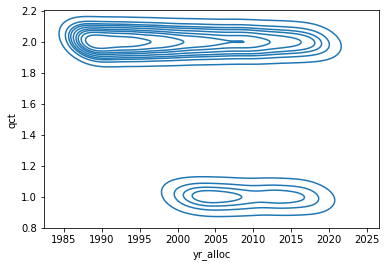

In [17]:
sns.kdeplot(data=df, x='yr_alloc', y='qct')

In [28]:
rankCorr('qct')

basis       0.350361
metro       0.180624
trgt_hml    0.139637
mff_ra      0.120339
low_ceil    0.106948
n_0br      -0.103279
allocamt   -0.117808
n_units    -0.124537
li_units   -0.125896
n_unitsr   -0.127041
li_unitr   -0.133588
fmha_515   -0.133911
yr_alloc   -0.374226
Name: qct, dtype: float64


In [29]:
rankCorr('li_units')

li_unitr    0.964765
n_unitsr    0.921130
n_units     0.916424
n_2br       0.749243
n_1br       0.603998
n_3br       0.556845
ceilunit    0.460360
n_0br       0.252483
n_4br       0.241717
allocamt    0.232836
yr_alloc    0.222844
fmha_515    0.140087
basis      -0.115118
mff_ra     -0.120211
qct        -0.125896
credit     -0.175507
bond       -0.374340
Name: li_units, dtype: float64


In [46]:
rankCorr('bond')

credit      0.470519
mff_ra      0.218542
basis       0.192184
fha         0.166831
trgt_eld    0.128722
metro       0.108412
fmha_515   -0.104827
n_0br      -0.115211
ceilunit   -0.197482
n_3br      -0.201099
yr_alloc   -0.239270
n_1br      -0.303607
n_2br      -0.316269
li_unitr   -0.355266
li_units   -0.374340
n_units    -0.385640
n_unitsr   -0.386469
Name: bond, dtype: float64


<AxesSubplot:xlabel='bond', ylabel='credit'>

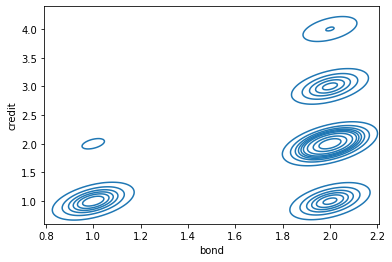

In [51]:
sns.kdeplot(x=df['bond'], y=df['credit'])

bond: 1 ~ yes, 2 ~ no

credit: 1 ~ 30% of PV, 2 ~ 70% of PV, 3 ~ Both, 4 ~ TCEP only (Tax credit exchange program funds)